In [23]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [25]:
dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
dataset['MEDV'] = boston_dataset.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


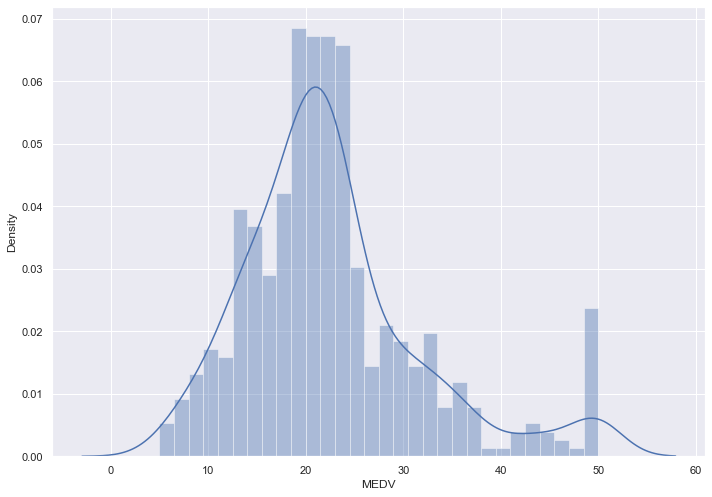

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['MEDV'], bins=30)
plt.show()

In [28]:
X = pd.DataFrame(np.c_[dataset['CRIM'], dataset['ZN'], dataset['INDUS'], dataset['CHAS'], dataset['NOX'], dataset['RM'], dataset['AGE'], dataset['DIS'], dataset['RAD'], dataset['TAX'], dataset['PTRATIO'], dataset['B'], dataset['LSTAT']], columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
Y = dataset['MEDV']

In [29]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [31]:
def predict( X, W, b ) :    
    return X.dot( W ) + b

In [32]:
def update_weights(X, Y, W, b, m, learning_rate, l1) :           
    Y_pred = predict( X, W, b )

    # calculate gradients      
    dW = np.zeros(n)
    
    for j in range(n):
        if W[j] > 0:
            dW[j] = ( - ( 2 * ( X[:, j] ).dot( Y - Y_pred ) ) + l1 ) / m
        else :
            dW[j] = ( - ( 2 * ( X[:, j] ).dot( Y - Y_pred ) ) - l1 ) / m
            
    db = - 2 * np.sum( Y - Y_pred ) / m

    # update weights    
    W = W - learning_rate * dW    
    b = b - learning_rate * db
    return W, b

In [33]:
def fit(X, Y, W, b, m, n, iterations, learning_rate, l1) :
    # gradient descent learning

    for i in range(iterations) :            
        W, b = update_weights(X, Y, W, b, m, learning_rate, l1)            
    return W, b

In [34]:
m, n = X.shape

W = np.zeros( n )

b = 0

W, b = fit(X_train, Y_train, W, b, m, n, 1000, 0.01, 500)

Y_pred = predict(X_test, W, b)

In [35]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

r2score(Y_pred, Y_test)

0.7111723681504267

In [36]:
# using scikit-learn libraries
lr = Lasso(alpha=0.01)
lr.fit(X_train, Y_train)

pred_test_rr= lr.predict(X_test)
print(r2_score(Y_test, pred_test_rr))

0.7351659330229006
